<span style="background-color: lightgreen"><font size =6>Project II: Stock Market</font></span>


**In this excercise, we will examine our knowledge on stock market**

**Stock Market**

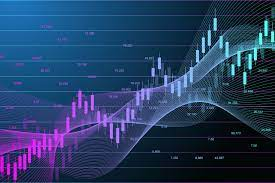

In [27]:
import os
from IPython.display import Image, display, Markdown
from IPython.display import HTML

DOCUMENTS_PATH = os.getcwd()

display(Markdown("**Stock Market**"))
display(Image(f"{DOCUMENTS_PATH}/nyse.png"))

## which libraries 

* libs

In [50]:
import os 
import re 
import requests 
import json
import numpy as np
import math 
import pandas as pd 
from pathlib import Path 
import matplotlib.pyplot as plt
from PIL import Image as img
import time 
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')  

In [29]:
# https://www.analyticsvidhya.com/blog/2021/07/stock-market-forecasting-using-time-series-analysis-with-arima-model/

* libs for time series

In [59]:
import yfinance as y   
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from typing import Dict

# jupyter kernelspec uninstall unwanted-kernel
# !pip install yfinance 

# Get data. Examine data

## Download stock market data

## choose a sticker and date range

In [61]:
ticker = "MSFT"

In [ ]:
rs = get_ticker_metadata(ticker)
display(Markdown(f"<font size = 6, color = blue>{ticker}  </font>"))
display(Markdown(f"<font size = 5, color = blue>{rs['company_name']}  </font>"))
display(Markdown(f"<font size = 5, color = blue>{rs['market_cap']}  </font>"))

In [ ]:
company_name, market_cap = rs['company_name'], rs['market_cap']

In [68]:
start_date, end_date = datetime(2021,1,1), datetime(2022,7,18)

In [56]:
def get_ticker_metadata(ticker: str) -> Dict[str, str]: 
    """
    :param ticker: stock ticker
    :return: Dictionary containing some metadata
    """
    result = {"company_name": "not_found",
              "market_cap": "not_found"} 
    try:
        info = yf.Ticker(ticker).info
        if info:
            if 'longName' in info:
                result["company_name"] = info['longName']
            if "marketCap" in info:
                result["market_cap"] = str(round((info['marketCap']/1000000000), 2)) + " blns$"
    except Exception as e:
        print(e)
    return result

## load data

In [66]:
def get_data(ticker, start_date, end_date):  
    start_date = datetime(2020, 1, 1)
    end_date = datetime(2023, 1, 1)

    # get the data
    data = yf.download(ticker, start = start_date,
                       end = end_date)

    # display
    plt.figure(figsize = (20,10))
    plt.title('Opening Prices from {} to {}'.format(start_date,
                                                    end_date))
    plt.plot(data['Open'])
    plt.show()
    
    return data 

[*********************100%***********************]  1 of 1 completed


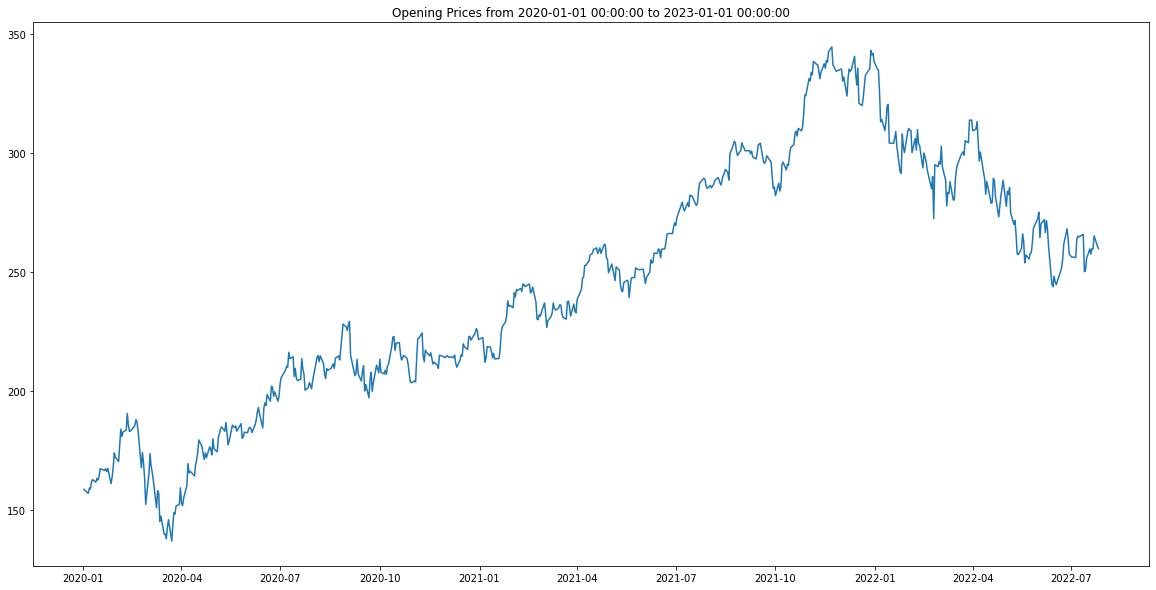

In [67]:
 

DATA = get_data(ticker, start_date, end_date)

* all columns:

## draw more columns

In [69]:
list(DATA)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [71]:
def draw_data(price_type): 
    #plot close price
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Date')
    plt.ylabel('Close Prices')
    plt.plot(data[price_type])
    plt.title('ARCH CAPITAL GROUP closing price')
    plt.show()
    

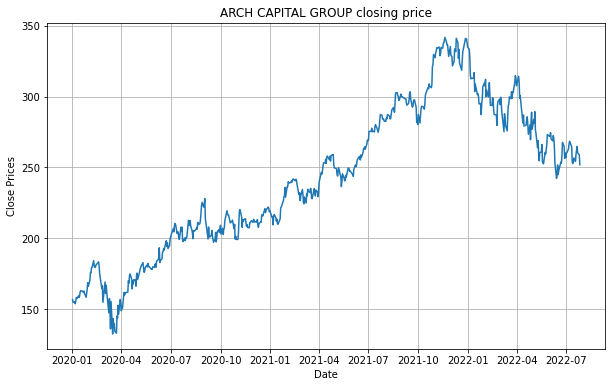

In [72]:
 draw_data("Adj Close")

# Stock Market: Part II

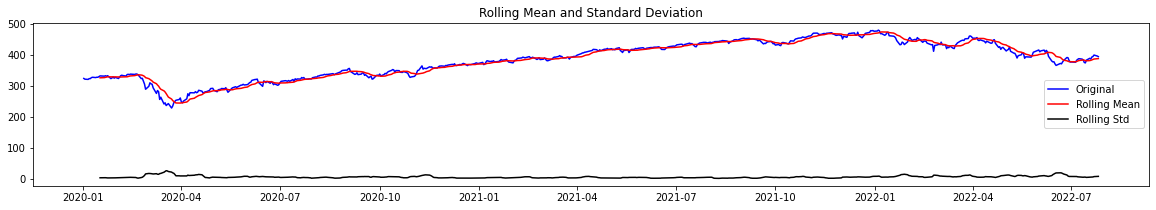

Results of dickey fuller test
Test Statistics                 -1.317079
p-value                          0.621323
No. of lags used                 0.000000
Number of observations used    645.000000
critical value (1%)             -3.440529
critical value (5%)             -2.866031
critical value (10%)            -2.569162
dtype: float64


In [10]:
#Test for staionarity
plt.rcParams["figure.figsize"] = (20,3)
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    
     
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(data["Open"])

In [11]:
timeseries =[9,2,34,7,5,6,7,8,9]
adfuller(timeseries,autolag='AIC')

(-11.410361645628031,
 7.275762826556185e-21,
 2,
 6,
 {'1%': -5.354256481481482,
  '5%': -3.6462381481481483,
  '10%': -2.901197777777778},
 19.849808018718942)

<Figure size 1440x216 with 0 Axes>

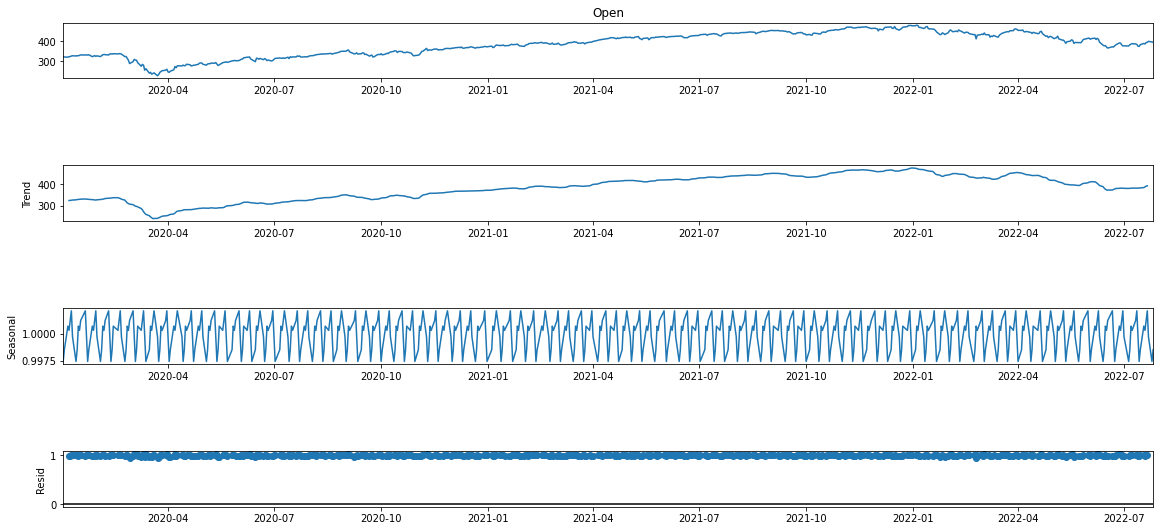

In [20]:
#To separate the trend and the seasonality from a time series, 
# we can decompose the series using the following code.
result = seasonal_decompose(data["Open"], period = 7, model='multiplicative' )
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


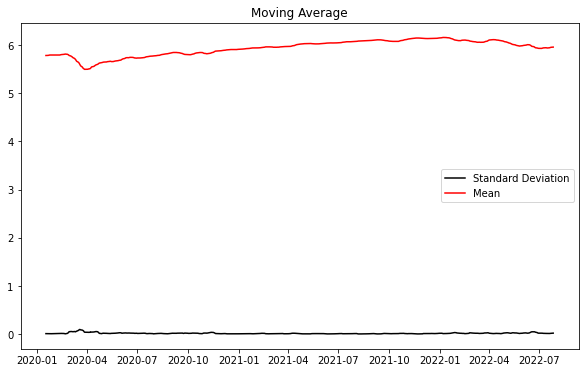

In [24]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(data["Open"])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

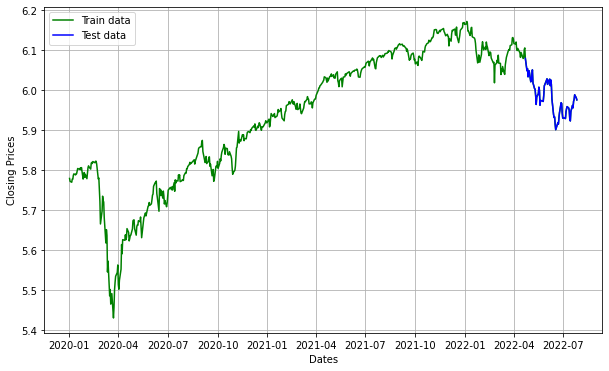

In [13]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3255.744, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3259.531, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3259.009, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3256.838, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-3258.638, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3258.134, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3256.794, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-3260.428, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-3259.620, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-3259.058, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-3259.909, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-3257.846, Time=0.14 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.272 seconds
                               SARIMAX Results                              

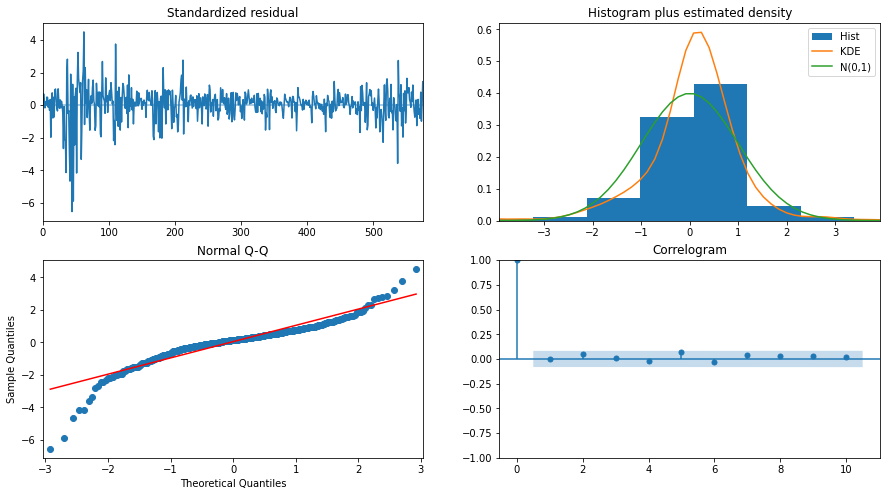

In [14]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [15]:
#Modeling
# Build Model
model = ARIMA(train_data, order = (1,1,2))
fitted = model.fit()  
print(fitted.summary())

# Forecast
# fc, se, conf = fitted.forecast(321, alpha=0.05)  # 95% conf
aaaa = fitted.forecast(12, alpha=0.05)  # 95% conf

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                  578
Model:                 ARIMA(1, 1, 2)   Log Likelihood                1632.164
Date:                Tue, 26 Jul 2022   AIC                          -3256.328
Time:                        19:08:41   BIC                          -3238.896
Sample:                             0   HQIC                         -3249.530
                                - 578                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5170      0.337     -1.533      0.125      -1.178       0.144
ma.L1          0.4246      0.332      1.279      0.201      -0.226       1.075
ma.L2          0.0069      0.041      0.169      0.8

In [18]:
fitted.forecast(3)

578    6.106390
579    6.106222
580    6.106309
Name: predicted_mean, dtype: float64

# Py Learning from Above

## List: advanced 
## Exception (optional)
## access a list
## Challenge: Can you wrap it to a function?

# Colab Review